In [66]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

In [67]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(np.array(snake_env.results['score']))

def plot_max_results(results, p_string):
    formatted_dict = { p_string: [],
                      'metrics': [],
                      'results': []}
    for parameter, result in results.items():
        _, max_train_score, max_test_score, meand_train_score, mean_test_score = result
        
        formatted_dict[p_string].append(parameter)
        formatted_dict['metrics'].append('Max Train Score')
        formatted_dict['results'].append(max_train_score)
        
        formatted_dict[p_string].append(parameter)
        formatted_dict['metrics'].append('Max Test Score')
        formatted_dict['results'].append(max_test_score)
        
        formatted_dict[p_string].append(parameter)
        formatted_dict['metrics'].append('Mean Train Score')
        formatted_dict['results'].append(mean_train_score)
        
        formatted_dict[p_string].append(parameter)
        formatted_dict['metrics'].append('Mean Test Score')
        formatted_dict['results'].append(mean_test_score)
        
    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x=p_string, y='results', hue='metrics')  
    
    plt.show()
        
           

In [31]:
for _ in range(10):
    learning_rate=random.uniform(0.001,0.1)
    print("lr: ", learning_rate)
    

lr:  0.06430325304733049
lr:  0.003476064767044027
lr:  0.02822790251854281
lr:  0.023097863076733453
lr:  0.07391065020223724
lr:  0.06799324925486823
lr:  0.0893257772027797
lr:  0.009606944430312198
lr:  0.04277026014884178
lr:  0.003949924724368965


In [32]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    learning_rate=random.uniform(0.001,0.1)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 1e+03    |
|    ep_rew_mean        | -7.5     |
| time/                 |          |
|    fps                | 451      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.2e-12 |
|    explained_variance | -8.07    |
|    learning_rate      | 0.0226   |
|    n_updates          | 999      |
|    policy_loss        | -0       |
|    value_loss         | 0.000373 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -8.89     |
| time/                 |           |
|    fps                | 457       |
|    iterations         | 2000      |
|    time_elapsed       | 21        |
|    total_timesteps    | 10000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 12        |
|    ep_rew_mean        | -50       |
| time/                 |           |
|    fps                | 307       |
|    iterations         | 2000      |
|    time_elapsed       | 32        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -5.83e-26 |
|    explained_variance | nan       |
|    learning_rate      | 0.0958    |
|    n_updates          | 1999      |
|    policy_loss        | -0        |
|    value_loss         | 0.114     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 12        |
|    ep_rew_mean        | -50       |
| time/                 |           |
|    fps                | 304       |
|    iterations         | 3000      |
|    time_elapsed       | 49        |
|    total_timesteps    | 15000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 936       |
|    ep_rew_mean        | -12.7     |
| time/                 |           |
|    fps                | 436       |
|    iterations         | 3000      |
|    time_elapsed       | 34        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.000235 |
|    explained_variance | -1.29     |
|    learning_rate      | 0.0106    |
|    n_updates          | 2999      |
|    policy_loss        | -3.46e-12 |
|    value_loss         | 2.48e-13  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 952       |
|    ep_rew_mean        | -12       |
| time/                 |           |
|    fps                | 436       |
|    iterations         | 4000      |
|    time_elapsed       | 45        |
|    total_timesteps    | 20000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -10       |
| time/                 |           |
|    fps                | 447       |
|    iterations         | 4000      |
|    time_elapsed       | 44        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -8.67e-11 |
|    explained_variance | -1.6e+07  |
|    learning_rate      | 0.0809    |
|    n_updates          | 3999      |
|    policy_loss        | -0        |
|    value_loss         | 0.0106    |
-------------------------------------


Learning Rate 0.022645159505556733


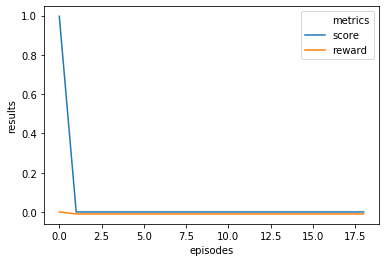

Max Train Score 1 Max Test Score 0
Mean Train Score 0.0524743132732229 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.003627060998702499


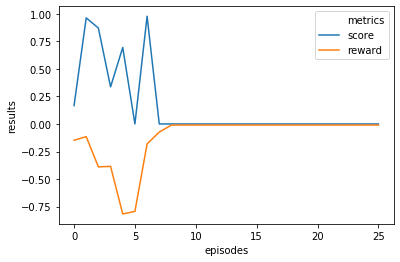

Max Train Score 2 Max Test Score 0
Mean Train Score 0.15412015915465466 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.0346848011352812


Max Train Score 1 Max Test Score 0
Mean Train Score 0.05226608187134503 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.09576409414847134


Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.03432285996615005


Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.010181838494634644


Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.010574921306512938


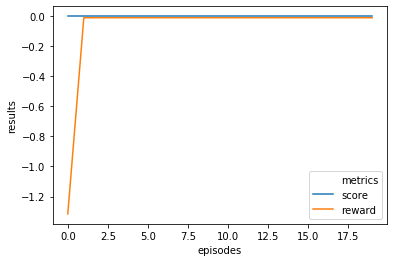

Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.08490194226839852


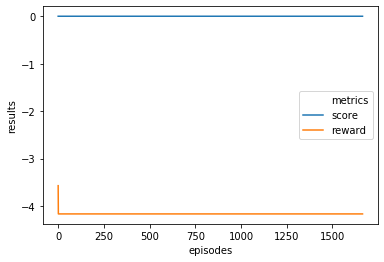

Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.06076887710532222


Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.08090569905416364


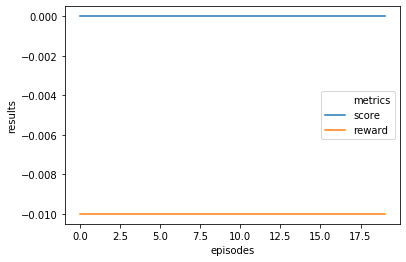

Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------


In [33]:
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

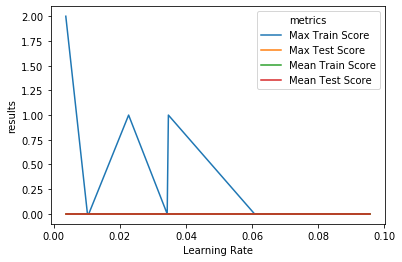

In [34]:
plot_max_results(results,'Learning Rate')

value above 0.01 are bad, the score is always 0


Using cpu device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -7.5      |
| time/                 |           |
|    fps                | 454       |
|    iterations         | 1000      |
|    time_elapsed       | 11        |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -7.23e-05 |
|    explained_variance | 0.0328    |
|    learning_rate      | 0.00757   |
|    n_updates          | 999       |
|    policy_loss        | 6.03e-09  |
|    value_loss         | 2.92e-05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1e+03     |
|    ep_rew_mean        | -8.89     |
| time/                 |           |
|    fps                | 452       |
|    iterations         | 2000      |
|    time_elapsed       | 22        |
|    total_timesteps    | 10000  

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 856       |
|    ep_rew_mean        | -16.4     |
| time/                 |           |
|    fps                | 460       |
|    iterations         | 2000      |
|    time_elapsed       | 21        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -2.87e-05 |
|    explained_variance | -0.57     |
|    learning_rate      | 0.00734   |
|    n_updates          | 1999      |
|    policy_loss        | 2.12e-13  |
|    value_loss         | 5.77e-15  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 901       |
|    ep_rew_mean        | -14.4     |
| time/                 |           |
|    fps                | 456       |
|    iterations         | 3000      |
|    time_elapsed       | 32        |
|    total_timesteps    | 15000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 741       |
|    ep_rew_mean        | -20.5     |
| time/                 |           |
|    fps                | 471       |
|    iterations         | 3000      |
|    time_elapsed       | 31        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -7.38e-08 |
|    explained_variance | -0.132    |
|    learning_rate      | 0.00851   |
|    n_updates          | 2999      |
|    policy_loss        | -0        |
|    value_loss         | 4.04e-11  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 795       |
|    ep_rew_mean        | -18.3     |
| time/                 |           |
|    fps                | 469       |
|    iterations         | 4000      |
|    time_elapsed       | 42        |
|    total_timesteps    | 20000     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 829      |
|    ep_rew_mean        | -17.9    |
| time/                 |          |
|    fps                | 455      |
|    iterations         | 4000     |
|    time_elapsed       | 43       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.00884 |
|    explained_variance | -0.00845 |
|    learning_rate      | 0.00431  |
|    n_updates          | 3999     |
|    policy_loss        | 4.52e-06 |
|    value_loss         | 0.000165 |
------------------------------------
Learning Rate 0.007567586080244362


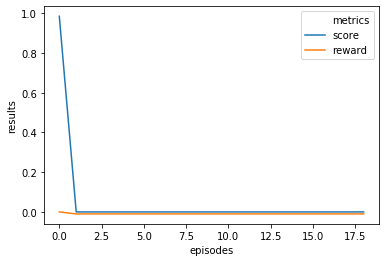

Max Train Score 1 Max Test Score 0
Mean Train Score 0.05185453791960216 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.009758041875814336


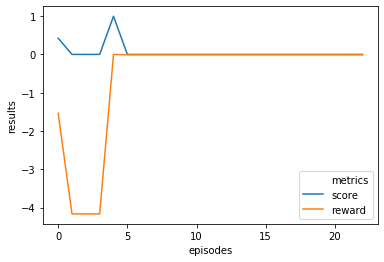

Max Train Score 1 Max Test Score 0
Mean Train Score 0.061742994576876445 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.008464641978276954


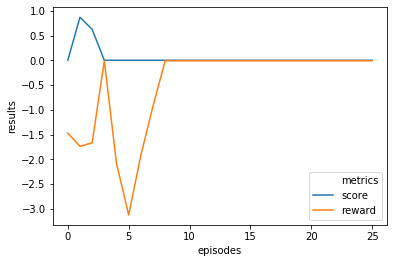

Max Train Score 1 Max Test Score 0
Mean Train Score 0.05748327759197324 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.007341146525934312


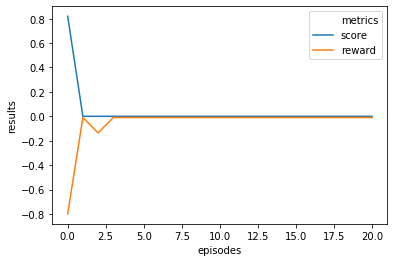

Max Train Score 1 Max Test Score 0
Mean Train Score 0.039047619047619046 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.003051084480863922


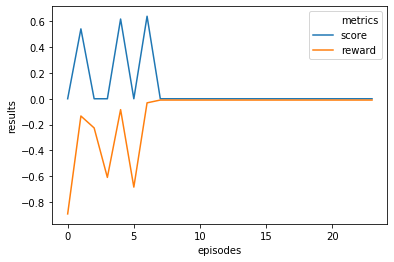

Max Train Score 1 Max Test Score 0
Mean Train Score 0.07498733812410595 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.00508069272131592


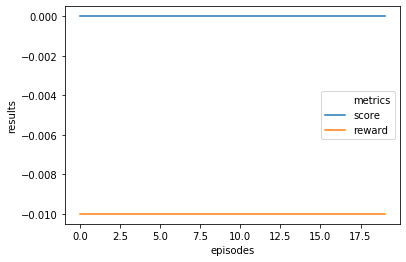

Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.008506993839766754


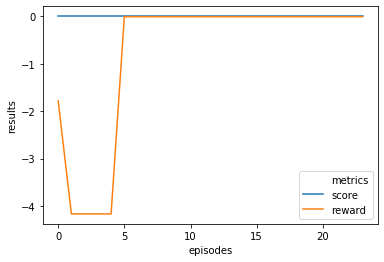

Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.002463886874404763


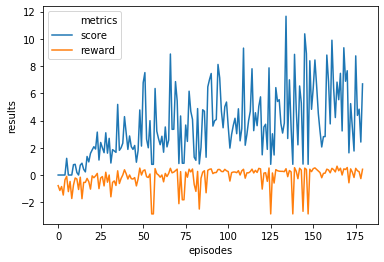

Max Train Score 21 Max Test Score 24
Mean Train Score 3.65778519990712 Mean Test Score 4.92948835380268
----------------------------------------------------------------------------------------------------
Learning Rate 0.0021423754673301236


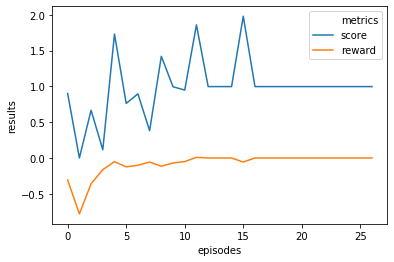

Max Train Score 3 Max Test Score 1
Mean Train Score 0.9854574332001859 Mean Test Score 0.9970119521912351
----------------------------------------------------------------------------------------------------
Learning Rate 0.004314462649265069


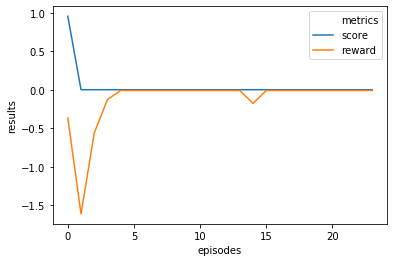

Max Train Score 1 Max Test Score 0
Mean Train Score 0.039755351681957186 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------


In [35]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    learning_rate=random.uniform(0.001,0.01)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

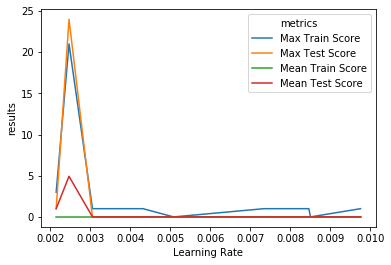

In [36]:
plot_max_results(results,'Learning Rate')

continue to be ruim

In [37]:
results = {}

# enable_render=True turns on the display
snake_env = SnakeEnv(440, 440, enable_render=False)
env = make_vec_env(lambda: snake_env, n_envs=1)

#gamma = random.uniform(0.95, 1)
learning_rate=1e-3#random.uniform(0.001,0.1)
#print("lr: ", learning_rate)

model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
model.learn(total_timesteps=20000, log_interval=1000)

# Print rewards and scores for each episode
max_train_score = snake_env.record
mean_train_score = np.mean(np.array(snake_env.results['score']))
max_test_score, mean_test_score = evaluate(model)

results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 121      |
|    ep_rew_mean        | -38.8    |
| time/                 |          |
|    fps                | 425      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.757   |
|    explained_variance | 0.0354   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.0124  |
|    value_loss         | 0.000346 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93.7     |
|    ep_rew_mean        | -15.6    |
| time/                 |          |
|    fps                | 426      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/             

Learning Rate 0.001


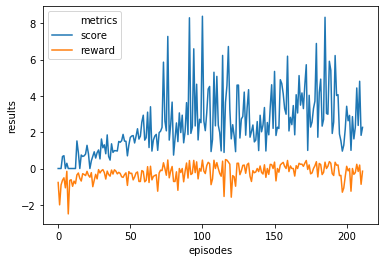

Max Train Score 16 Max Test Score 18
Mean Train Score 2.448609577078677 Mean Test Score 3.2268487491563276
----------------------------------------------------------------------------------------------------


In [38]:
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

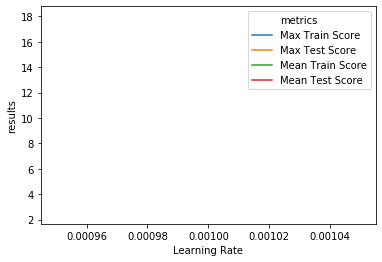

In [39]:
plot_max_results(results,'Learning Rate')

below 0.005

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 812      |
|    ep_rew_mean        | -16      |
| time/                 |          |
|    fps                | 461      |
|    iterations         | 1000     |
|    time_elapsed       | 10       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.00108 |
|    explained_variance | -2.8     |
|    learning_rate      | 0.00462  |
|    n_updates          | 999      |
|    policy_loss        | 2e-07    |
|    value_loss         | 2.66e-06 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 906      |
|    ep_rew_mean        | -13      |
| time/                 |          |
|    fps                | 458      |
|    iterations         | 2000     |
|    time_elapsed       | 21       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 546      |
|    ep_rew_mean        | -28.3    |
| time/                 |          |
|    fps                | 454      |
|    iterations         | 2000     |
|    time_elapsed       | 21       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.00045 |
|    explained_variance | -5.13    |
|    learning_rate      | 0.00261  |
|    n_updates          | 1999     |
|    policy_loss        | 1.19e-07 |
|    value_loss         | 8.78e-06 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 569      |
|    ep_rew_mean        | -27.6    |
| time/                 |          |
|    fps                | 456      |
|    iterations         | 3000     |
|    time_elapsed       | 32       |
|    total_timesteps    | 15000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 344       |
|    ep_rew_mean        | -22.1     |
| time/                 |           |
|    fps                | 445       |
|    iterations         | 3000      |
|    time_elapsed       | 33        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -6.03e-05 |
|    explained_variance | -1.48     |
|    learning_rate      | 0.00346   |
|    n_updates          | 2999      |
|    policy_loss        | -1.5e-09  |
|    value_loss         | 7.77e-08  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 417       |
|    ep_rew_mean        | -18.9     |
| time/                 |           |
|    fps                | 446       |
|    iterations         | 4000      |
|    time_elapsed       | 44        |
|    total_timesteps    | 20000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 603       |
|    ep_rew_mean        | -25       |
| time/                 |           |
|    fps                | 428       |
|    iterations         | 4000      |
|    time_elapsed       | 46        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -6.09e-05 |
|    explained_variance | nan       |
|    learning_rate      | 0.00499   |
|    n_updates          | 3999      |
|    policy_loss        | -0        |
|    value_loss         | 0         |
-------------------------------------
Learning Rate 0.004615133008901208


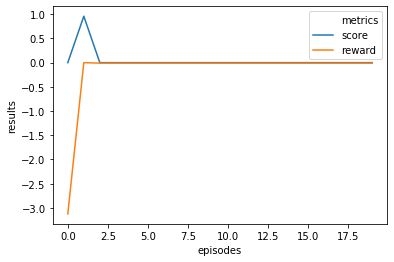

Max Train Score 1 Max Test Score 0
Mean Train Score 0.04794061302681992 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.0008099446251252175


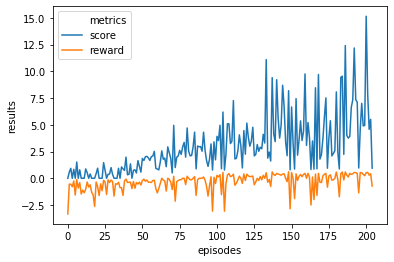

Max Train Score 30 Max Test Score 28
Mean Train Score 2.976274028790862 Mean Test Score 6.772064738293599
----------------------------------------------------------------------------------------------------
Learning Rate 0.0010312617095196111


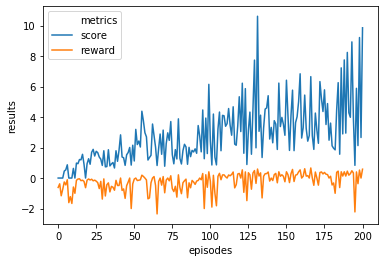

Max Train Score 20 Max Test Score 24
Mean Train Score 2.8053032576600283 Mean Test Score 5.325111158181722
----------------------------------------------------------------------------------------------------
Learning Rate 0.0026145200835767327


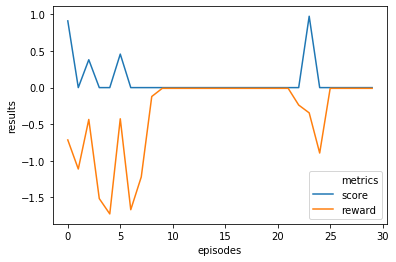

Max Train Score 1 Max Test Score 0
Mean Train Score 0.09075779359560342 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.0030040259062182936


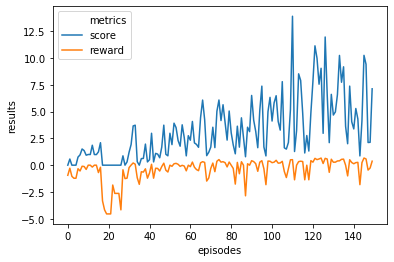

Max Train Score 24 Max Test Score 31
Mean Train Score 3.223098855938343 Mean Test Score 7.08804519123963
----------------------------------------------------------------------------------------------------
Learning Rate 0.001393869798074254


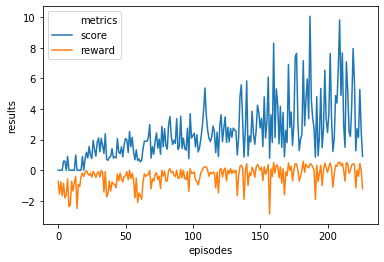

Max Train Score 18 Max Test Score 20
Mean Train Score 2.4636269707816547 Mean Test Score 4.317798855158651
----------------------------------------------------------------------------------------------------
Learning Rate 0.003463995384871836


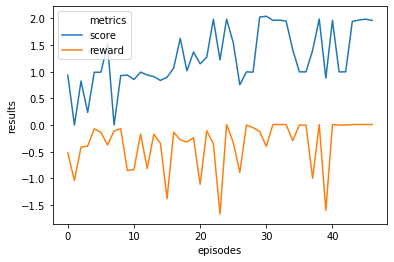

Max Train Score 4 Max Test Score 2
Mean Train Score 1.259444698387165 Mean Test Score 1.5306541468331079
----------------------------------------------------------------------------------------------------
Learning Rate 0.0020242652659855902


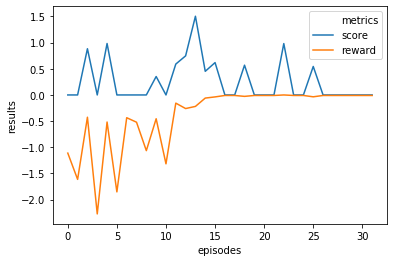

Max Train Score 2 Max Test Score 1
Mean Train Score 0.25694743670143066 Mean Test Score 0.20440050497598083
----------------------------------------------------------------------------------------------------
Learning Rate 0.0034917064967628646


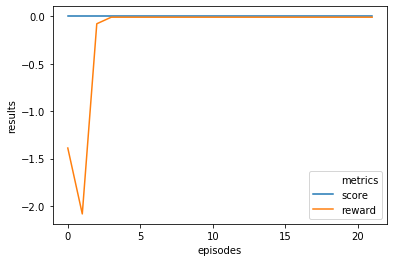

Max Train Score 0 Max Test Score 0
Mean Train Score 0.0 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.004992813964308333


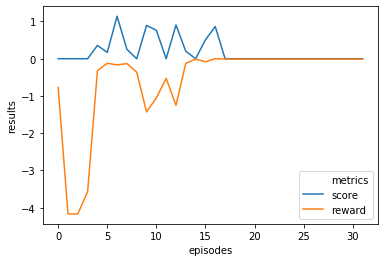

Max Train Score 3 Max Test Score 0
Mean Train Score 0.18916443813943093 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------


In [40]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    learning_rate=random.uniform(0.0005,0.005)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

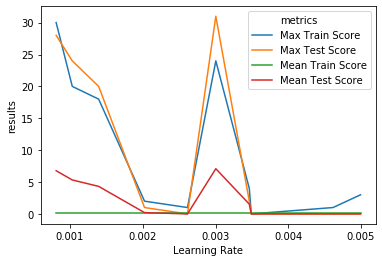

In [41]:
plot_max_results(results,'Learning Rate')

above 0.002 is ruim

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 82.3     |
|    ep_rew_mean        | -19.3    |
| time/                 |          |
|    fps                | 419      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.226   |
|    explained_variance | -67.1    |
|    learning_rate      | 0.00188  |
|    n_updates          | 999      |
|    policy_loss        | 2.26     |
|    value_loss         | 24.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 98.9     |
|    ep_rew_mean        | 6.3      |
| time/                 |          |
|    fps                | 416      |
|    iterations         | 2000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 75.2     |
|    ep_rew_mean        | -1.2     |
| time/                 |          |
|    fps                | 420      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.377   |
|    explained_variance | 0.174    |
|    learning_rate      | 0.00151  |
|    n_updates          | 1999     |
|    policy_loss        | 4.35     |
|    value_loss         | 12.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 96.6     |
|    ep_rew_mean        | 13.5     |
| time/                 |          |
|    fps                | 427      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 88       |
|    ep_rew_mean        | 9.4      |
| time/                 |          |
|    fps                | 414      |
|    iterations         | 3000     |
|    time_elapsed       | 36       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.0416  |
|    explained_variance | -50.4    |
|    learning_rate      | 0.00172  |
|    n_updates          | 2999     |
|    policy_loss        | -0.514   |
|    value_loss         | 868      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 108      |
|    ep_rew_mean        | 23.3     |
| time/                 |          |
|    fps                | 413      |
|    iterations         | 4000     |
|    time_elapsed       | 48       |
|    total_timesteps    | 20000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 78.5      |
|    ep_rew_mean        | 0.3       |
| time/                 |           |
|    fps                | 418       |
|    iterations         | 4000      |
|    time_elapsed       | 47        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.11     |
|    explained_variance | -2.37e+03 |
|    learning_rate      | 0.000433  |
|    n_updates          | 3999      |
|    policy_loss        | 0.093     |
|    value_loss         | 52.5      |
-------------------------------------
Learning Rate 0.0018765385698148445


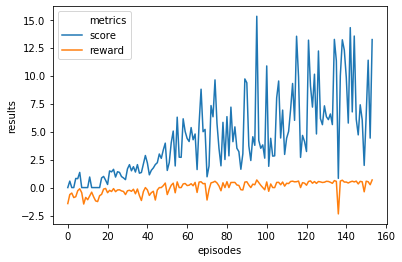

Max Train Score 28 Max Test Score 32
Mean Train Score 4.482337662406793 Mean Test Score 5.674169078548869
----------------------------------------------------------------------------------------------------
Learning Rate 0.00031006694979910103


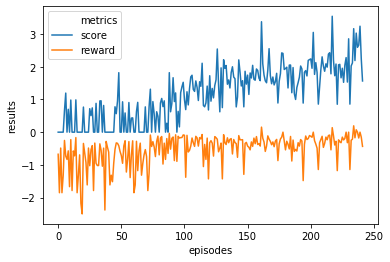

Max Train Score 7 Max Test Score 10
Mean Train Score 1.1907509994522325 Mean Test Score 2.338547385062298
----------------------------------------------------------------------------------------------------
Learning Rate 0.0002069250285315693


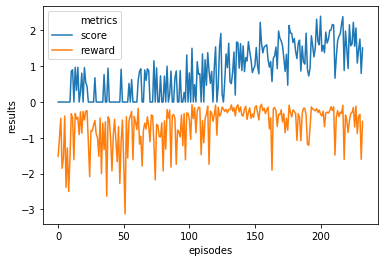

Max Train Score 4 Max Test Score 7
Mean Train Score 0.8462250164266757 Mean Test Score 1.7072496129960393
----------------------------------------------------------------------------------------------------
Learning Rate 0.0015139654156219068


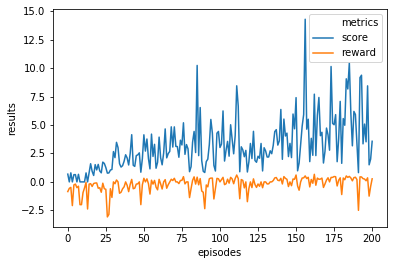

Max Train Score 29 Max Test Score 28
Mean Train Score 3.174858130552704 Mean Test Score 5.887736685710024
----------------------------------------------------------------------------------------------------
Learning Rate 0.0009960665361957708


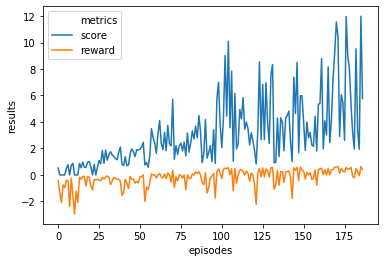

Max Train Score 24 Max Test Score 28
Mean Train Score 3.114823849962368 Mean Test Score 5.334138894658829
----------------------------------------------------------------------------------------------------
Learning Rate 0.0006631906195681269


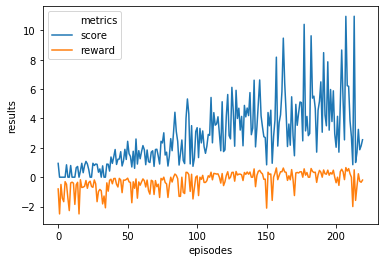

Max Train Score 21 Max Test Score 23
Mean Train Score 2.8051960582546744 Mean Test Score 4.670612650093644
----------------------------------------------------------------------------------------------------
Learning Rate 0.0017163683654063098


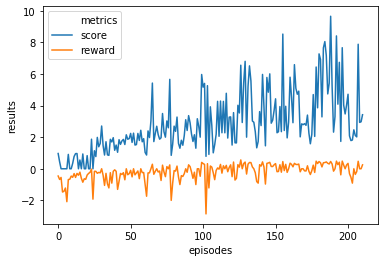

Max Train Score 18 Max Test Score 21
Mean Train Score 2.81956119138166 Mean Test Score 4.396612652502499
----------------------------------------------------------------------------------------------------
Learning Rate 0.0008241543930175345


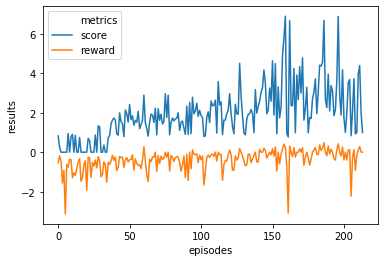

Max Train Score 13 Max Test Score 16
Mean Train Score 1.9528304865600954 Mean Test Score 2.431656009335302
----------------------------------------------------------------------------------------------------
Learning Rate 0.001938956634761187


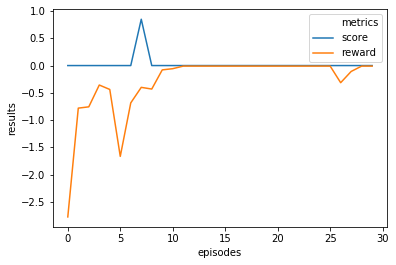

Max Train Score 1 Max Test Score 0
Mean Train Score 0.028333333333333332 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.0004330589733701239


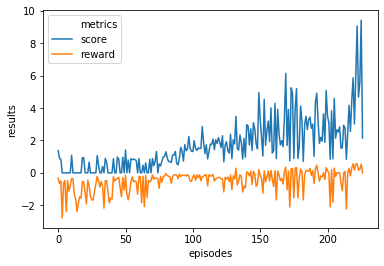

Max Train Score 17 Max Test Score 23
Mean Train Score 1.693646707514737 Mean Test Score 4.230285451290997
----------------------------------------------------------------------------------------------------


In [42]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    learning_rate=random.uniform(0.0002,0.002)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

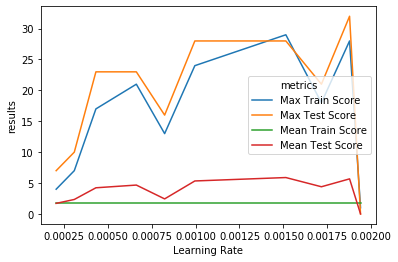

In [43]:
plot_max_results(results,'Learning Rate')

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 84       |
|    ep_rew_mean        | -33.6    |
| time/                 |          |
|    fps                | 417      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.235   |
|    explained_variance | 0.0273   |
|    learning_rate      | 0.00121  |
|    n_updates          | 999      |
|    policy_loss        | -0.0498  |
|    value_loss         | 0.573    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.5     |
|    ep_rew_mean        | -14      |
| time/                 |          |
|    fps                | 416      |
|    iterations         | 2000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.5     |
|    ep_rew_mean        | -22.3    |
| time/                 |          |
|    fps                | 421      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 0.0975   |
|    learning_rate      | 0.00127  |
|    n_updates          | 1999     |
|    policy_loss        | 0.0805   |
|    value_loss         | 4.02     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 90.5      |
|    ep_rew_mean        | -15.8     |
| time/                 |           |
|    fps                | 427       |
|    iterations         | 3000      |
|    time_elapsed       | 35        |
|    total_timesteps    | 15000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 92.9     |
|    ep_rew_mean        | 4        |
| time/                 |          |
|    fps                | 426      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.285   |
|    explained_variance | -0.187   |
|    learning_rate      | 0.00109  |
|    n_updates          | 2999     |
|    policy_loss        | -1.41    |
|    value_loss         | 2.91     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 101      |
|    ep_rew_mean        | 18.7     |
| time/                 |          |
|    fps                | 424      |
|    iterations         | 4000     |
|    time_elapsed       | 47       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 102      |
|    ep_rew_mean        | 20.1     |
| time/                 |          |
|    fps                | 424      |
|    iterations         | 4000     |
|    time_elapsed       | 47       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0182  |
|    explained_variance | 0.498    |
|    learning_rate      | 0.00103  |
|    n_updates          | 3999     |
|    policy_loss        | 0.0238   |
|    value_loss         | 64.1     |
------------------------------------
Learning Rate 0.0012141425375856553


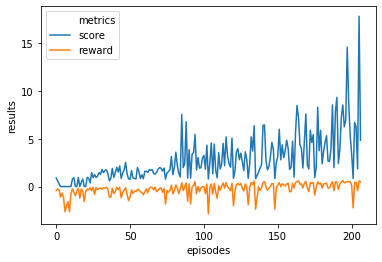

Max Train Score 33 Max Test Score 27
Mean Train Score 2.787675515746 Mean Test Score 5.467833581127992
----------------------------------------------------------------------------------------------------
Learning Rate 0.0010969570660822104


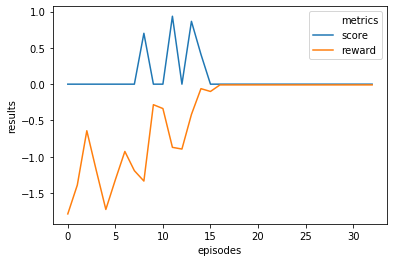

Max Train Score 1 Max Test Score 0
Mean Train Score 0.08816917152409816 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.001269144840908652


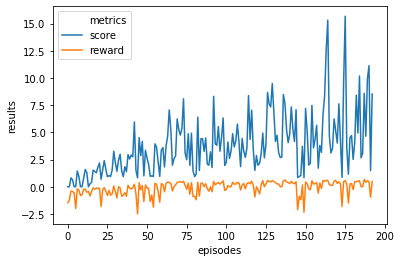

Max Train Score 31 Max Test Score 29
Mean Train Score 3.7328103103264367 Mean Test Score 7.282170736117992
----------------------------------------------------------------------------------------------------
Learning Rate 0.0012721376185419863


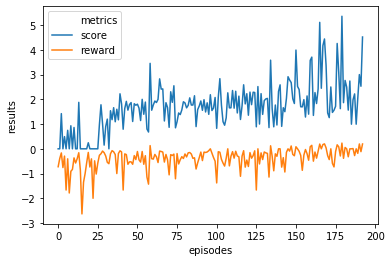

Max Train Score 10 Max Test Score 15
Mean Train Score 1.6928822949055724 Mean Test Score 2.4938898816265103
----------------------------------------------------------------------------------------------------
Learning Rate 0.001388966367814157


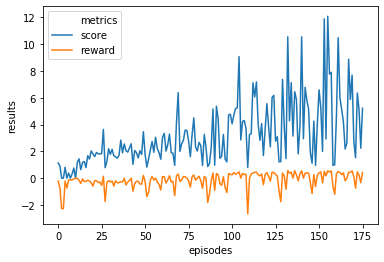

Max Train Score 22 Max Test Score 23
Mean Train Score 3.196687593765068 Mean Test Score 4.515435135289039
----------------------------------------------------------------------------------------------------
Learning Rate 0.0007026340687259347


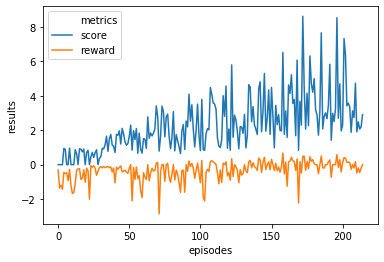

Max Train Score 17 Max Test Score 21
Mean Train Score 2.2909173587846756 Mean Test Score 4.326433458052694
----------------------------------------------------------------------------------------------------
Learning Rate 0.0010894596044358344


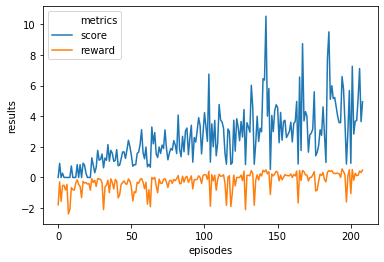

Max Train Score 21 Max Test Score 30
Mean Train Score 2.602740748200881 Mean Test Score 5.579216031691247
----------------------------------------------------------------------------------------------------
Learning Rate 0.0009766676500459698


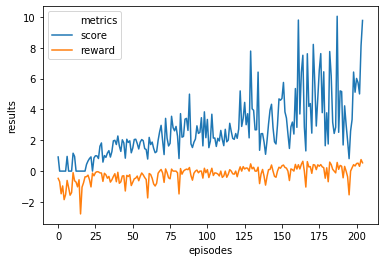

Max Train Score 20 Max Test Score 19
Mean Train Score 2.68532800308928 Mean Test Score 4.856873351542212
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013428464600810707


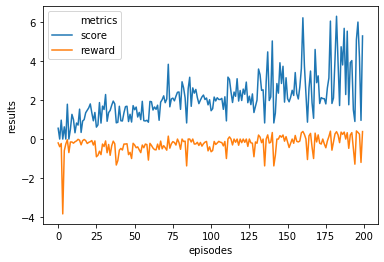

Max Train Score 14 Max Test Score 15
Mean Train Score 2.123802490205881 Mean Test Score 3.736143527569939
----------------------------------------------------------------------------------------------------
Learning Rate 0.0010327124341710878


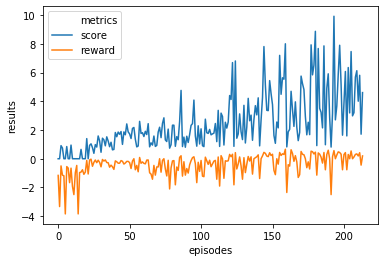

Max Train Score 19 Max Test Score 24
Mean Train Score 2.4860817223470644 Mean Test Score 5.454060431093913
----------------------------------------------------------------------------------------------------


In [44]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    learning_rate=random.uniform(0.0005,0.0014)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

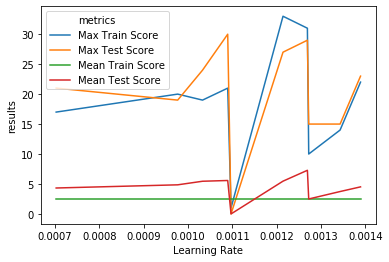

In [45]:
plot_max_results(results,'Learning Rate')

Using cpu device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 96.2      |
|    ep_rew_mean        | -41.8     |
| time/                 |           |
|    fps                | 409       |
|    iterations         | 1000      |
|    time_elapsed       | 12        |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -0.846    |
|    explained_variance | -3.84e+03 |
|    learning_rate      | 0.000961  |
|    n_updates          | 999       |
|    policy_loss        | 2.19      |
|    value_loss         | 40.3      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 92.1      |
|    ep_rew_mean        | -11.4     |
| time/                 |           |
|    fps                | 411       |
|    iterations         | 2000      |
|    time_elapsed       | 24        |
|    total_timesteps    | 10000  

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 83.5     |
|    ep_rew_mean        | -12.2    |
| time/                 |          |
|    fps                | 401      |
|    iterations         | 2000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.108   |
|    explained_variance | -32      |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.00963 |
|    value_loss         | 0.247    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.2     |
|    ep_rew_mean        | 8.6      |
| time/                 |          |
|    fps                | 404      |
|    iterations         | 3000     |
|    time_elapsed       | 37       |
|    total_timesteps    | 15000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 104       |
|    ep_rew_mean        | -1.3      |
| time/                 |           |
|    fps                | 416       |
|    iterations         | 3000      |
|    time_elapsed       | 36        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.00603  |
|    explained_variance | 0.00419   |
|    learning_rate      | 0.002     |
|    n_updates          | 2999      |
|    policy_loss        | -1.06e-05 |
|    value_loss         | 0.000896  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 124       |
|    ep_rew_mean        | 6         |
| time/                 |           |
|    fps                | 415       |
|    iterations         | 4000      |
|    time_elapsed       | 48        |
|    total_timesteps    | 20000     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 119      |
|    ep_rew_mean        | 33.6     |
| time/                 |          |
|    fps                | 425      |
|    iterations         | 4000     |
|    time_elapsed       | 46       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0131  |
|    explained_variance | -213     |
|    learning_rate      | 0.0009   |
|    n_updates          | 3999     |
|    policy_loss        | 0.0137   |
|    value_loss         | 64       |
------------------------------------
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 120      |
|    ep_rew_mean        | -42.9    |
| time/                 |          |
|    fps                | 436      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/             

Learning Rate 0.0009610612889534735


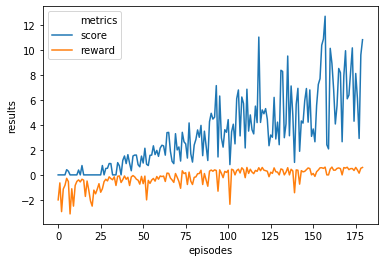

Max Train Score 23 Max Test Score 28
Mean Train Score 3.3185861102296124 Mean Test Score 6.222642267705582
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013779226379577784


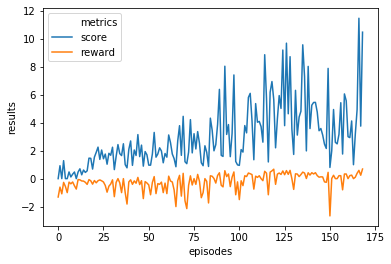

Max Train Score 22 Max Test Score 21
Mean Train Score 2.975407703688036 Mean Test Score 4.811120926885946
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013197979371411934


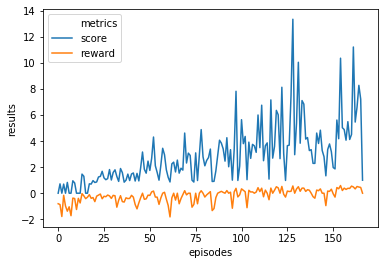

Max Train Score 25 Max Test Score 24
Mean Train Score 2.895913327959948 Mean Test Score 4.676335776237656
----------------------------------------------------------------------------------------------------
Learning Rate 0.001


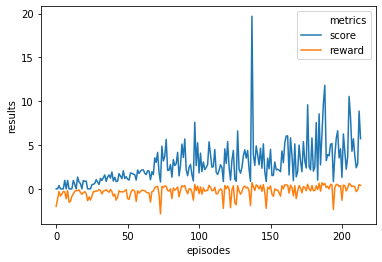

Max Train Score 37 Max Test Score 30
Mean Train Score 2.8383999179689354 Mean Test Score 5.282874507431531
----------------------------------------------------------------------------------------------------
Learning Rate 0.0015


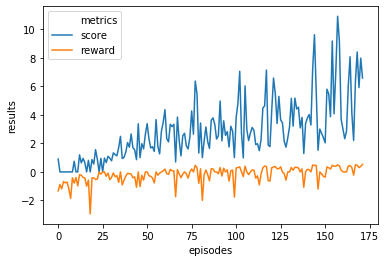

Max Train Score 21 Max Test Score 27
Mean Train Score 2.867891653979511 Mean Test Score 5.980902945546372
----------------------------------------------------------------------------------------------------
Learning Rate 0.0018


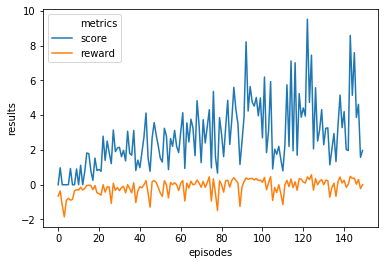

Max Train Score 17 Max Test Score 16
Mean Train Score 2.7861401065723794 Mean Test Score 4.733405774253568
----------------------------------------------------------------------------------------------------
Learning Rate 0.002


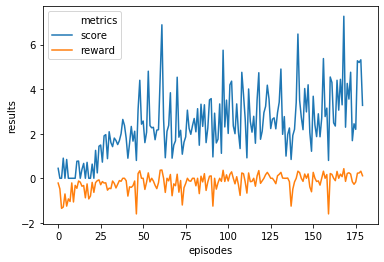

Max Train Score 14 Max Test Score 24
Mean Train Score 2.378357992798051 Mean Test Score 4.12684308468473
----------------------------------------------------------------------------------------------------
Learning Rate 0.00095


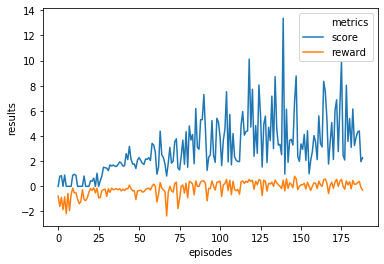

Max Train Score 22 Max Test Score 25
Mean Train Score 3.066739426494794 Mean Test Score 5.946132484385652
----------------------------------------------------------------------------------------------------
Learning Rate 0.00092


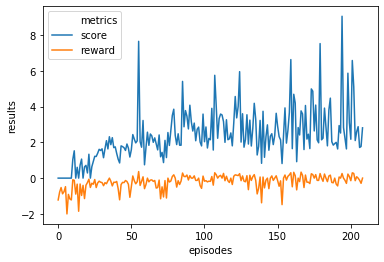

Max Train Score 16 Max Test Score 16
Mean Train Score 2.3675941138456653 Mean Test Score 3.633739573274071
----------------------------------------------------------------------------------------------------
Learning Rate 0.0009


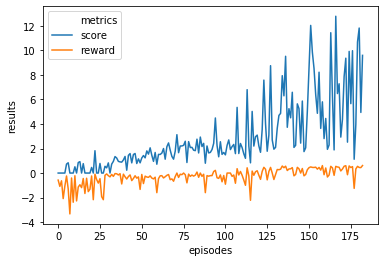

Max Train Score 25 Max Test Score 25
Mean Train Score 2.86636317539202 Mean Test Score 6.135147998104228
----------------------------------------------------------------------------------------------------
Learning Rate 0.00085


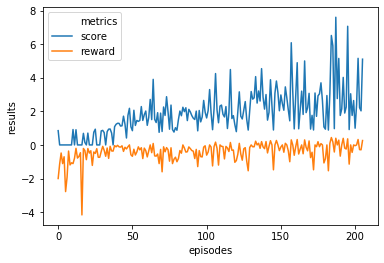

Max Train Score 15 Max Test Score 16
Mean Train Score 1.886133417849817 Mean Test Score 3.013720086795392
----------------------------------------------------------------------------------------------------
Learning Rate 0.00082


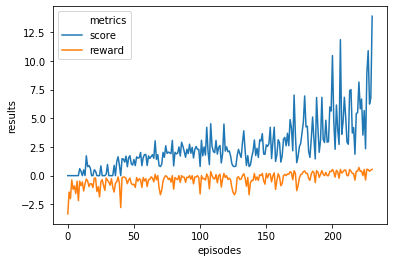

Max Train Score 26 Max Test Score 26
Mean Train Score 2.496942402622008 Mean Test Score 6.661448609229265
----------------------------------------------------------------------------------------------------
Learning Rate 0.0008


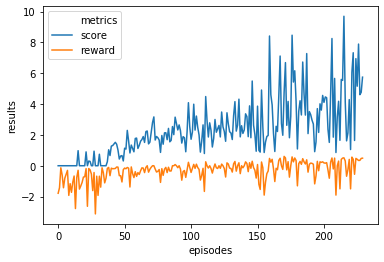

Max Train Score 19 Max Test Score 25
Mean Train Score 2.36757902966757 Mean Test Score 5.426679896997835
----------------------------------------------------------------------------------------------------


In [46]:
learning_rates=[0.0009610612889534735,0.0013779226379577784,0.0013197979371411934,0.001,0.0015,0.0018,0.002,0.00095,0.00092,0.0009,0.00085,0.00082,0.0008]

results = {}
for learning_rate in learning_rates:
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    #learning_rate=random.uniform(0.0005,0.0014)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

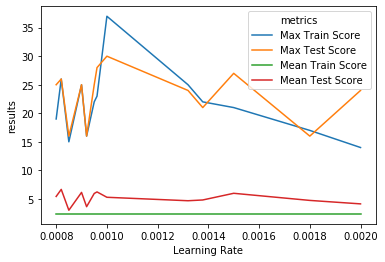

In [47]:
plot_max_results(results,'Learning Rate')

com gamma=0.97

Using cpu device
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 161       |
|    ep_rew_mean        | -41       |
| time/                 |           |
|    fps                | 416       |
|    iterations         | 1000      |
|    time_elapsed       | 12        |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -0.318    |
|    explained_variance | -6.19e+04 |
|    learning_rate      | 0.000961  |
|    n_updates          | 999       |
|    policy_loss        | 0.0304    |
|    value_loss         | 20        |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 90.6     |
|    ep_rew_mean        | -22.2    |
| time/                 |          |
|    fps                | 407      |
|    iterations         | 2000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 10000    |
| tr

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 79.6     |
|    ep_rew_mean        | -17.7    |
| time/                 |          |
|    fps                | 425      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.117   |
|    explained_variance | -3.54    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.00462 |
|    value_loss         | 0.0424   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 89.5     |
|    ep_rew_mean        | 3.2      |
| time/                 |          |
|    fps                | 420      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 107       |
|    ep_rew_mean        | 31.2      |
| time/                 |           |
|    fps                | 414       |
|    iterations         | 3000      |
|    time_elapsed       | 36        |
|    total_timesteps    | 15000     |
| train/                |           |
|    entropy_loss       | -0.000248 |
|    explained_variance | nan       |
|    learning_rate      | 0.002     |
|    n_updates          | 2999      |
|    policy_loss        | -2.18e-05 |
|    value_loss         | 1.43      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 122       |
|    ep_rew_mean        | 34.6      |
| time/                 |           |
|    fps                | 417       |
|    iterations         | 4000      |
|    time_elapsed       | 47        |
|    total_timesteps    | 20000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 122       |
|    ep_rew_mean        | 42.2      |
| time/                 |           |
|    fps                | 433       |
|    iterations         | 4000      |
|    time_elapsed       | 46        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.00188  |
|    explained_variance | nan       |
|    learning_rate      | 0.0009    |
|    n_updates          | 3999      |
|    policy_loss        | -0.000223 |
|    value_loss         | 1.61      |
-------------------------------------
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 135      |
|    ep_rew_mean        | -43.8    |
| time/                 |          |
|    fps                | 407      |
|    iterations         | 1000     |
|    time_elapsed       | 12       |
|    total_timesteps    | 5000     |
| tr

Learning Rate 0.0009610612889534735


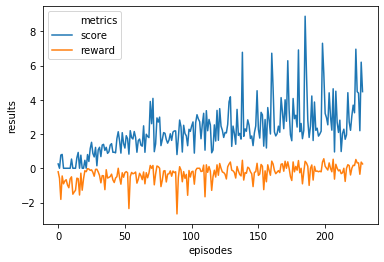

Max Train Score 17 Max Test Score 16
Mean Train Score 2.2091731493945366 Mean Test Score 3.6287199351558956
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013779226379577784


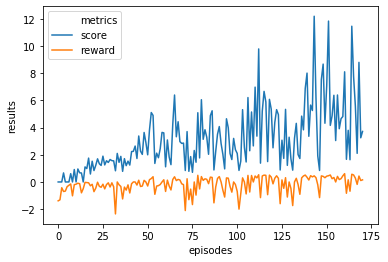

Max Train Score 22 Max Test Score 27
Mean Train Score 3.1229754171795348 Mean Test Score 5.180861298402003
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013197979371411934


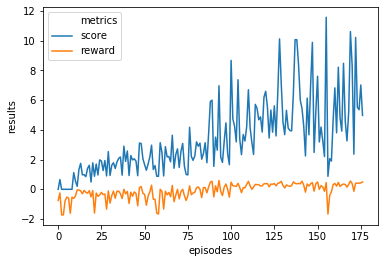

Max Train Score 21 Max Test Score 21
Mean Train Score 3.391461131812951 Mean Test Score 4.7812774378463
----------------------------------------------------------------------------------------------------
Learning Rate 0.001


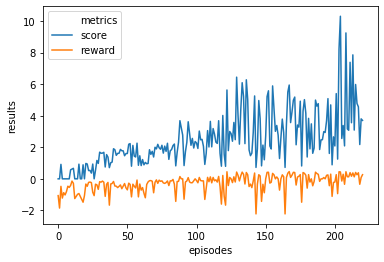

Max Train Score 20 Max Test Score 22
Mean Train Score 2.459531930916437 Mean Test Score 3.4731074137161353
----------------------------------------------------------------------------------------------------
Learning Rate 0.0015


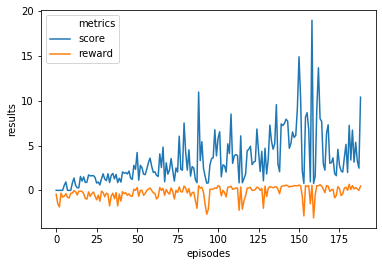

Max Train Score 36 Max Test Score 28
Mean Train Score 3.4053444960266757 Mean Test Score 5.044517030816379
----------------------------------------------------------------------------------------------------
Learning Rate 0.0018


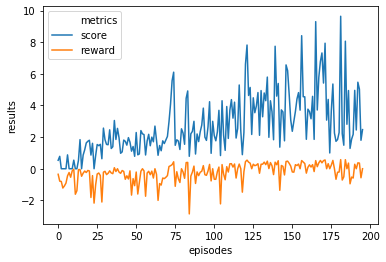

Max Train Score 21 Max Test Score 20
Mean Train Score 2.760629224382074 Mean Test Score 3.713994038672063
----------------------------------------------------------------------------------------------------
Learning Rate 0.002


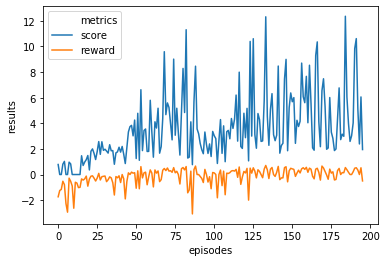

Max Train Score 24 Max Test Score 21
Mean Train Score 3.583520080211938 Mean Test Score 6.054887116322143
----------------------------------------------------------------------------------------------------
Learning Rate 0.00095


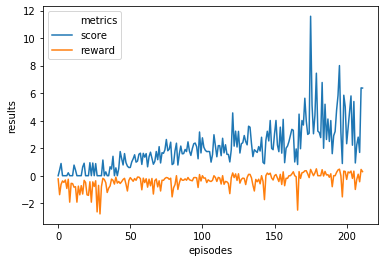

Max Train Score 19 Max Test Score 20
Mean Train Score 2.044663876585698 Mean Test Score 2.987017980147957
----------------------------------------------------------------------------------------------------
Learning Rate 0.00092


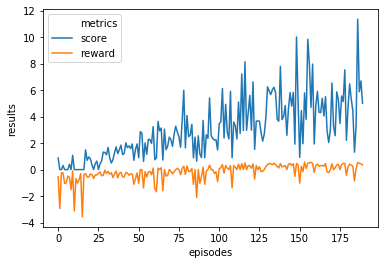

Max Train Score 20 Max Test Score 25
Mean Train Score 2.9900458925659557 Mean Test Score 5.396512990682343
----------------------------------------------------------------------------------------------------
Learning Rate 0.0009


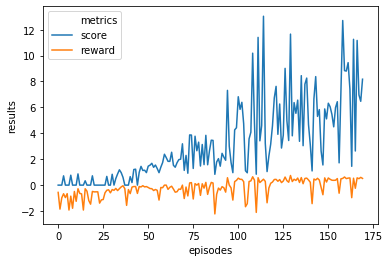

Max Train Score 24 Max Test Score 29
Mean Train Score 3.122813865312944 Mean Test Score 6.819278824016228
----------------------------------------------------------------------------------------------------
Learning Rate 0.00085


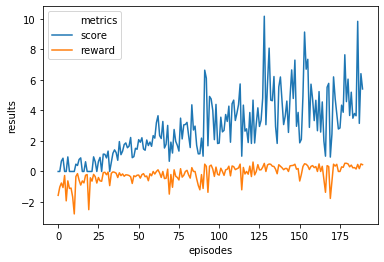

Max Train Score 20 Max Test Score 24
Mean Train Score 2.8510151826895407 Mean Test Score 5.801995682765222
----------------------------------------------------------------------------------------------------
Learning Rate 0.00082


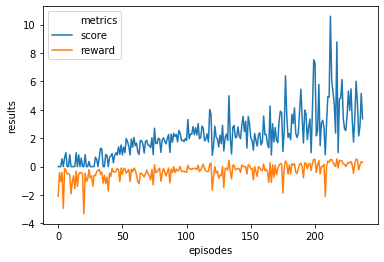

Max Train Score 21 Max Test Score 26
Mean Train Score 2.174984342955128 Mean Test Score 4.259277852279024
----------------------------------------------------------------------------------------------------
Learning Rate 0.0008


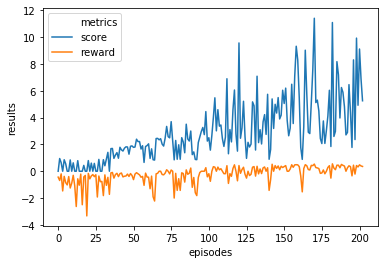

Max Train Score 21 Max Test Score 27
Mean Train Score 2.8961409323657543 Mean Test Score 4.841498664412609
----------------------------------------------------------------------------------------------------


In [48]:
learning_rates=[0.0009610612889534735,0.0013779226379577784,0.0013197979371411934,0.001,0.0015,0.0018,0.002,0.00095,0.00092,0.0009,0.00085,0.00082,0.0008]

results = {}
for learning_rate in learning_rates:
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    #learning_rate=random.uniform(0.0005,0.0014)
    #print("lr: ", learning_rate)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate,gamma=0.97)#, seed=42)#, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

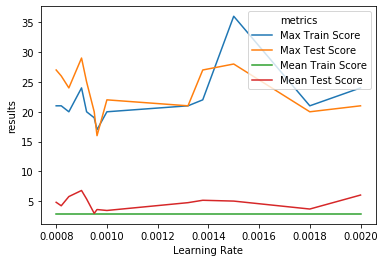

In [49]:
plot_max_results(results,'Learning Rate')

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 143      |
|    ep_rew_mean        | -42.3    |
| time/                 |          |
|    fps                | 432      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.05    |
|    explained_variance | -28.5    |
|    learning_rate      | 0.000961 |
|    n_updates          | 999      |
|    policy_loss        | 0.0192   |
|    value_loss         | 0.000323 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 98.2      |
|    ep_rew_mean        | -27.8     |
| time/                 |           |
|    fps                | 426       |
|    iterations         | 2000      |
|    time_elapsed       | 23        |
|    total_timesteps    | 10000     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 310      |
|    ep_rew_mean        | -33.8    |
| time/                 |          |
|    fps                | 441      |
|    iterations         | 2000     |
|    time_elapsed       | 22       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.601   |
|    explained_variance | -0.406   |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.0194  |
|    value_loss         | 0.000707 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 145       |
|    ep_rew_mean        | -23.7     |
| time/                 |           |
|    fps                | 432       |
|    iterations         | 3000      |
|    time_elapsed       | 34        |
|    total_timesteps    | 15000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 118      |
|    ep_rew_mean        | 19       |
| time/                 |          |
|    fps                | 427      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.00163 |
|    explained_variance | 0.642    |
|    learning_rate      | 0.002    |
|    n_updates          | 2999     |
|    policy_loss        | 0.000795 |
|    value_loss         | 20.9     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 151      |
|    ep_rew_mean        | 36.1     |
| time/                 |          |
|    fps                | 431      |
|    iterations         | 4000     |
|    time_elapsed       | 46       |
|    total_timesteps    | 20000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 108       |
|    ep_rew_mean        | 8.6       |
| time/                 |           |
|    fps                | 423       |
|    iterations         | 4000      |
|    time_elapsed       | 47        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.00353  |
|    explained_variance | -0.105    |
|    learning_rate      | 0.0009    |
|    n_updates          | 3999      |
|    policy_loss        | -2.35e-06 |
|    value_loss         | 0.000149  |
-------------------------------------
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 81.9     |
|    ep_rew_mean        | -40.3    |
| time/                 |          |
|    fps                | 418      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| tr

Learning Rate 0.0009610612889534735


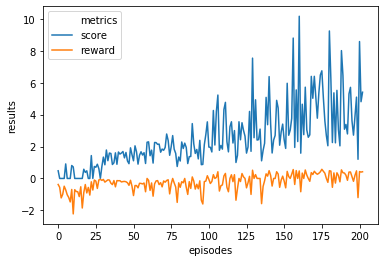

Max Train Score 18 Max Test Score 20
Mean Train Score 2.5276375091386485 Mean Test Score 4.32052855612921
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013779226379577784


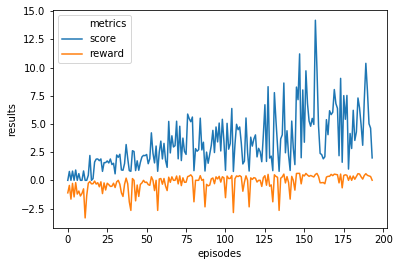

Max Train Score 26 Max Test Score 24
Mean Train Score 3.3455093777452407 Mean Test Score 6.468455313749474
----------------------------------------------------------------------------------------------------
Learning Rate 0.0013197979371411934


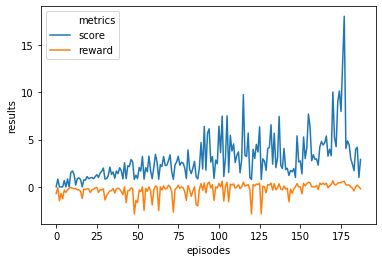

Max Train Score 34 Max Test Score 19
Mean Train Score 2.874496676920302 Mean Test Score 3.197139298789495
----------------------------------------------------------------------------------------------------
Learning Rate 0.001


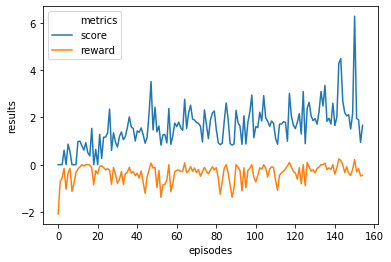

Max Train Score 11 Max Test Score 18
Mean Train Score 1.600055919288989 Mean Test Score 2.3373066475781634
----------------------------------------------------------------------------------------------------
Learning Rate 0.0015


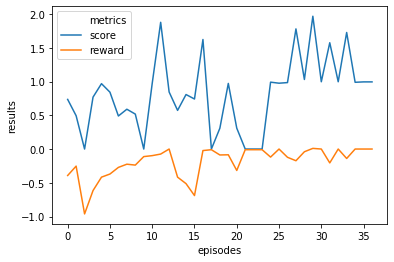

Max Train Score 3 Max Test Score 3
Mean Train Score 0.822833834435535 Mean Test Score 1.2394315865535146
----------------------------------------------------------------------------------------------------
Learning Rate 0.0018


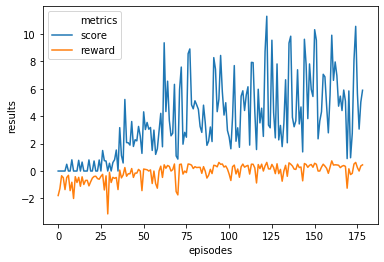

Max Train Score 23 Max Test Score 26
Mean Train Score 3.70583268830786 Mean Test Score 5.813504086563089
----------------------------------------------------------------------------------------------------
Learning Rate 0.002


Max Train Score 23 Max Test Score 21
Mean Train Score 3.5585812877435683 Mean Test Score 4.343723546855867
----------------------------------------------------------------------------------------------------
Learning Rate 0.00095


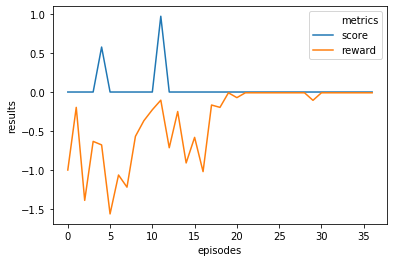

Max Train Score 1 Max Test Score 0
Mean Train Score 0.04182365878168523 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Learning Rate 0.00092


Max Train Score 15 Max Test Score 20
Mean Train Score 1.8884775607037567 Mean Test Score 3.13620460612022
----------------------------------------------------------------------------------------------------
Learning Rate 0.0009


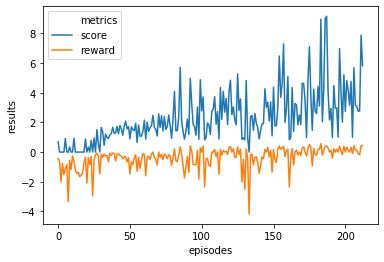

Max Train Score 17 Max Test Score 15
Mean Train Score 2.3032093577572113 Mean Test Score 3.613283482709907
----------------------------------------------------------------------------------------------------
Learning Rate 0.00085


Max Train Score 15 Max Test Score 18
Mean Train Score 2.073981192633922 Mean Test Score 3.310815891027229
----------------------------------------------------------------------------------------------------
Learning Rate 0.00082


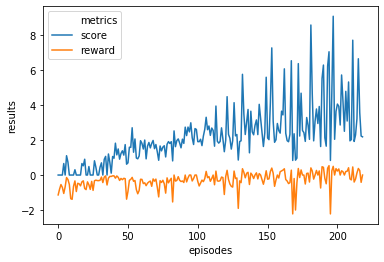

Max Train Score 16 Max Test Score 28
Mean Train Score 2.2156306651218713 Mean Test Score 3.9024202169986615
----------------------------------------------------------------------------------------------------
Learning Rate 0.0008


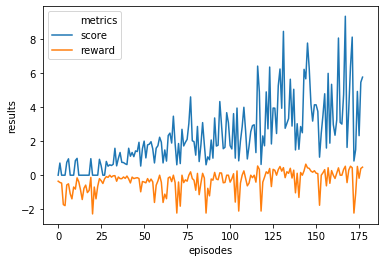

Max Train Score 19 Max Test Score 26
Mean Train Score 2.3193212626808957 Mean Test Score 5.208742138684252
----------------------------------------------------------------------------------------------------
Learning rate max results  0


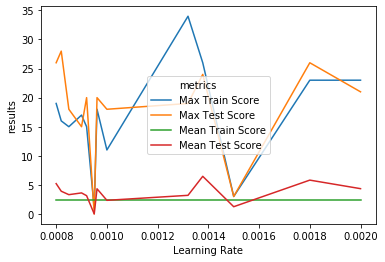

----------------------------------------------------------------------------------------------------
Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 186      |
|    ep_rew_mean        | -45.4    |
| time/                 |          |
|    fps                | 436      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.0826  |
|    explained_variance | -0.326   |
|    learning_rate      | 0.000961 |
|    n_updates          | 999      |
|    policy_loss        | 1.62e-05 |
|    value_loss         | 4.01e-05 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 318      |
|    ep_rew_mean        | -39.7    |
| time/                 |          |
|    fps                | 434      |
|    iterations         | 2000 

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 353       |
|    ep_rew_mean        | -39.2     |
| time/                 |           |
|    fps                | 438       |
|    iterations         | 2000      |
|    time_elapsed       | 22        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -0.00531  |
|    explained_variance | 0.0643    |
|    learning_rate      | 0.001     |
|    n_updates          | 1999      |
|    policy_loss        | -8.84e-12 |
|    value_loss         | 1.64e-16  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 457      |
|    ep_rew_mean        | -34.5    |
| time/                 |          |
|    fps                | 445      |
|    iterations         | 3000     |
|    time_elapsed       | 33       |
|    total_timesteps    | 15000    |
| train/             

In [ ]:
learning_rates=[0.0009610612889534735,0.0013779226379577784,0.0013197979371411934,0.001,0.0015,0.0018,0.002,0.00095,0.00092,0.0009,0.00085,0.00082,0.0008]
for i in range(10):
    results = {}
    for learning_rate in learning_rates:
        # enable_render=True turns on the display
        snake_env = SnakeEnv(440, 440, enable_render=False)
        env = make_vec_env(lambda: snake_env, n_envs=1)

        #gamma = random.uniform(0.95, 1)
        #learning_rate=random.uniform(0.0005,0.0014)
        #print("lr: ", learning_rate)

        model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate,gamma=0.97)#, seed=42)#, gamma=gamma)
        model.learn(total_timesteps=20000, log_interval=1000)

        # Print rewards and scores for each episode
        max_train_score = snake_env.record
        mean_train_score = np.mean(np.array(snake_env.results['score']))
        max_test_score, mean_test_score = evaluate(model)

        results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

    for learning_rate, result in results.items():
        metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result

        print("Learning Rate", learning_rate)
        plot_metrics(metrics)    
        print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
        print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
        print("-"*100)
    
    print("Learning rate max results ", i)
    plot_max_results(results,'Learning Rate')
    print("-"*100)

os resultados dos teste falam que 0.001 seja um bom compromisso

### Testando: use_rms_prop (Adam optimizer)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 166      |
|    ep_rew_mean        | -40      |
| time/                 |          |
|    fps                | 437      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.548   |
|    explained_variance | -0.00827 |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.00102 |
|    value_loss         | 0.00144  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 114      |
|    ep_rew_mean        | -15.1    |
| time/                 |          |
|    fps                | 435      |
|    iterations         | 2000     |
|    time_elapsed       | 22       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 114      |
|    ep_rew_mean        | -15.1    |
| time/                 |          |
|    fps                | 406      |
|    iterations         | 2000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.19    |
|    explained_variance | -141     |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -9.1     |
|    value_loss         | 721      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.1     |
|    ep_rew_mean        | 14.8     |
| time/                 |          |
|    fps                | 414      |
|    iterations         | 3000     |
|    time_elapsed       | 36       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.1     |
|    ep_rew_mean        | 14.8     |
| time/                 |          |
|    fps                | 440      |
|    iterations         | 3000     |
|    time_elapsed       | 34       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.00452 |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 0.00372  |
|    value_loss         | 59       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 121      |
|    ep_rew_mean        | 33.1     |
| time/                 |          |
|    fps                | 440      |
|    iterations         | 4000     |
|    time_elapsed       | 45       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 121      |
|    ep_rew_mean        | 33.1     |
| time/                 |          |
|    fps                | 421      |
|    iterations         | 4000     |
|    time_elapsed       | 47       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0129  |
|    explained_variance | 0.474    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.000711 |
|    value_loss         | 0.482    |
------------------------------------
Learning Rate 0.001


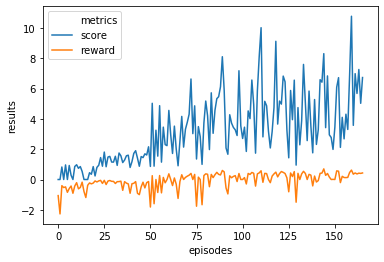

Max Train Score 19 Max Test Score 23
Mean Train Score 3.2303186907490673 Mean Test Score 5.686755266101022
----------------------------------------------------------------------------------------------------


In [51]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #gamma = random.uniform(0.95, 1)
    #learning_rate=random.uniform(0.001,0.1)
    learning_rate=1e-3

    model = A2C(MlpPolicy, env, verbose=1, learning_rate=learning_rate, seed=42,use_rms_prop=True)#, gamma=gamma, normalize_advantage=True)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)

    results[learning_rate] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

for learning_rate, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Learning Rate", learning_rate)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

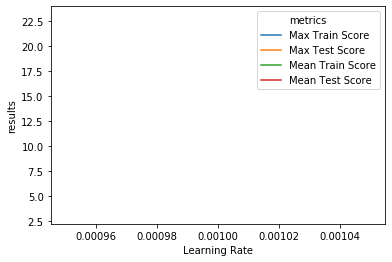

In [52]:
plot_max_results(results,'Learning Rate')

### Testando: n_eval_episode

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 154      |
|    ep_rew_mean        | -39.4    |
| time/                 |          |
|    fps                | 437      |
|    iterations         | 1000     |
|    time_elapsed       | 11       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.02    |
|    explained_variance | 0.491    |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.158    |
|    value_loss         | 0.0394   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 106      |
|    ep_rew_mean        | -11.3    |
| time/                 |          |
|    fps                | 431      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95       |
|    ep_rew_mean        | -17.8    |
| time/                 |          |
|    fps                | 421      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.089   |
|    explained_variance | 0.185    |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 0.175    |
|    value_loss         | 8.02     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 91.4     |
|    ep_rew_mean        | 7.6      |
| time/                 |          |
|    fps                | 420      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 90.1     |
|    ep_rew_mean        | 4.3      |
| time/                 |          |
|    fps                | 420      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.156   |
|    explained_variance | 0.428    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 0.0458   |
|    value_loss         | 0.151    |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 107       |
|    ep_rew_mean        | 16.9      |
| time/                 |           |
|    fps                | 417       |
|    iterations         | 4000      |
|    time_elapsed       | 47        |
|    total_timesteps    | 20000     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 172      |
|    ep_rew_mean        | -11.4    |
| time/                 |          |
|    fps                | 444      |
|    iterations         | 4000     |
|    time_elapsed       | 44       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.0183  |
|    explained_variance | -0.73    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.00759  |
|    value_loss         | 18.9     |
------------------------------------
n_eval_episode 3989.9549378046427


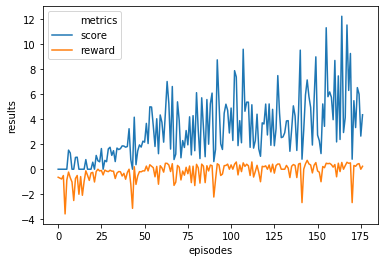

Max Train Score 23 Max Test Score 28
Mean Train Score 3.217449763420501 Mean Test Score 6.350252827653961
----------------------------------------------------------------------------------------------------
n_eval_episode 9506.588340364453


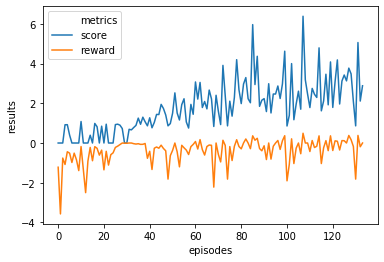

Max Train Score 11 Max Test Score 20
Mean Train Score 1.8087566012345182 Mean Test Score 3.5744633923334495
----------------------------------------------------------------------------------------------------
n_eval_episode 1406.066068662573


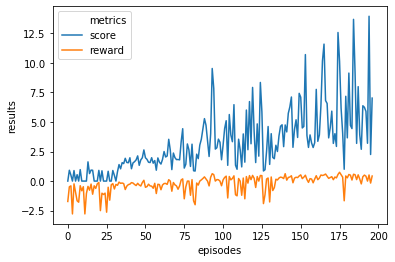

Max Train Score 27 Max Test Score 29
Mean Train Score 3.262614101434363 Mean Test Score 7.359027081346473
----------------------------------------------------------------------------------------------------
n_eval_episode 7492.091172722403


Max Train Score 25 Max Test Score 20
Mean Train Score 2.645193522690066 Mean Test Score 4.518794410413516
----------------------------------------------------------------------------------------------------
n_eval_episode 9348.173553029324


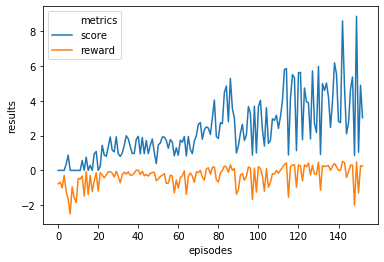

Max Train Score 17 Max Test Score 16
Mean Train Score 2.29909630665011 Mean Test Score 3.707218109652488
----------------------------------------------------------------------------------------------------
n_eval_episode 5349.459600011828


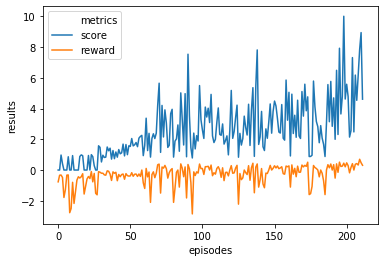

Max Train Score 19 Max Test Score 20
Mean Train Score 2.587464010022707 Mean Test Score 4.299570758157948
----------------------------------------------------------------------------------------------------
n_eval_episode 7028.526533970164


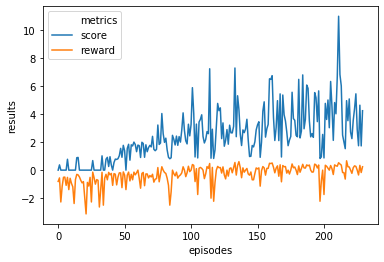

Max Train Score 22 Max Test Score 27
Mean Train Score 2.4328864647942754 Mean Test Score 5.320417718561839
----------------------------------------------------------------------------------------------------
n_eval_episode 8604.296551658219


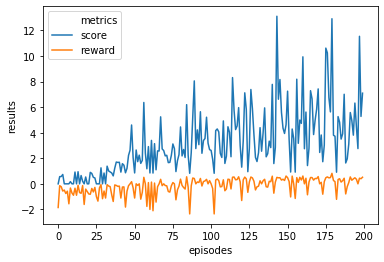

Max Train Score 26 Max Test Score 25
Mean Train Score 3.1688906488549513 Mean Test Score 4.971095069398199
----------------------------------------------------------------------------------------------------
n_eval_episode 7199.444569072537


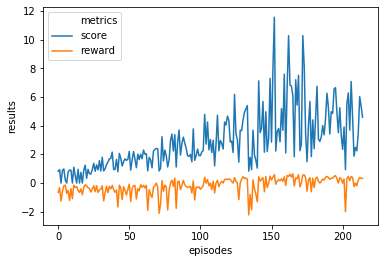

Max Train Score 23 Max Test Score 20
Mean Train Score 2.914089013842185 Mean Test Score 4.495027579157888
----------------------------------------------------------------------------------------------------
n_eval_episode 3409.61294372762


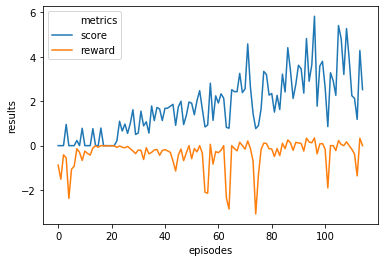

Max Train Score 12 Max Test Score 14
Mean Train Score 1.8160730412307031 Mean Test Score 3.4856906659319495
----------------------------------------------------------------------------------------------------


In [53]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #entropy = random.uniform(0, 0.1)
    
    n_eval_episode = random.uniform(1000,10000)
    
    #gamma=0.97 is the best one?
    #leaning_rate=??? see the best result from previous test
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, gamma=0.97)#seed=42, gamma=0.97)#, ent_coef=entropy)
    model.learn(total_timesteps=20000, log_interval=1000, n_eval_episodes=n_eval_episode)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[n_eval_episode] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for n_eval_episode, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("n_eval_episode", n_eval_episode)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

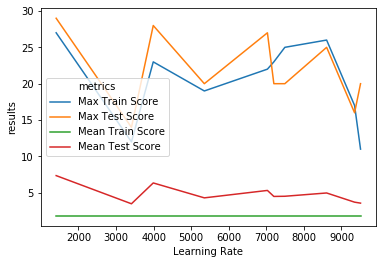

In [54]:
plot_max_results(results,'Learning Rate')

parece bom um n_eval_episodes entre 1000 e 4000

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.4     |
|    ep_rew_mean        | -35.8    |
| time/                 |          |
|    fps                | 382      |
|    iterations         | 1000     |
|    time_elapsed       | 13       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.412   |
|    explained_variance | nan      |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | 0.00572  |
|    value_loss         | 0.00141  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 83.2     |
|    ep_rew_mean        | -6.7     |
| time/                 |          |
|    fps                | 380      |
|    iterations         | 2000     |
|    time_elapsed       | 26       |
|    total_timesteps    | 10000    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 81.2      |
|    ep_rew_mean        | -14.2     |
| time/                 |           |
|    fps                | 384       |
|    iterations         | 2000      |
|    time_elapsed       | 26        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -0.375    |
|    explained_variance | -2.49e+04 |
|    learning_rate      | 0.001     |
|    n_updates          | 1999      |
|    policy_loss        | -56       |
|    value_loss         | 1.87e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 87.9     |
|    ep_rew_mean        | -3.6     |
| time/                 |          |
|    fps                | 385      |
|    iterations         | 3000     |
|    time_elapsed       | 38       |
|    total_timesteps    | 15000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.8     |
|    ep_rew_mean        | 10.9     |
| time/                 |          |
|    fps                | 433      |
|    iterations         | 3000     |
|    time_elapsed       | 34       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.0143  |
|    explained_variance | 0.523    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 0.00104  |
|    value_loss         | 0.952    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 122      |
|    ep_rew_mean        | 34.7     |
| time/                 |          |
|    fps                | 434      |
|    iterations         | 4000     |
|    time_elapsed       | 45       |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 128      |
|    ep_rew_mean        | 43.4     |
| time/                 |          |
|    fps                | 433      |
|    iterations         | 4000     |
|    time_elapsed       | 46       |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.00875 |
|    explained_variance | 0.418    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.000655 |
|    value_loss         | 0.305    |
------------------------------------
n_eval_episode 3767.586821199376


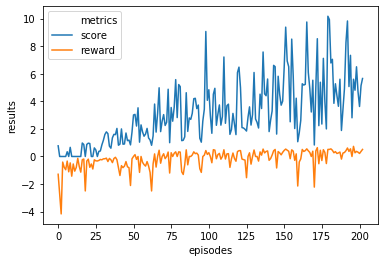

Max Train Score 21 Max Test Score 26
Mean Train Score 3.140544381627942 Mean Test Score 6.168091315992353
----------------------------------------------------------------------------------------------------
n_eval_episode 1031.7013187270886


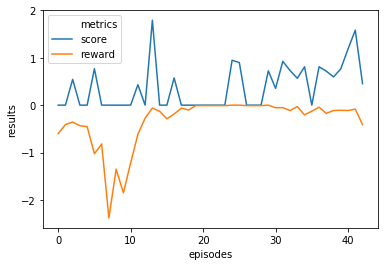

Max Train Score 3 Max Test Score 4
Mean Train Score 0.3763721856504648 Mean Test Score 1.1813745115922387
----------------------------------------------------------------------------------------------------
n_eval_episode 2558.2089006651213


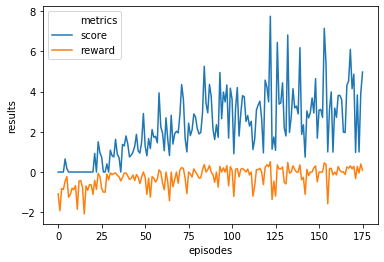

Max Train Score 14 Max Test Score 18
Mean Train Score 2.2571289836109405 Mean Test Score 3.66257812453365
----------------------------------------------------------------------------------------------------
n_eval_episode 1987.5934882954098


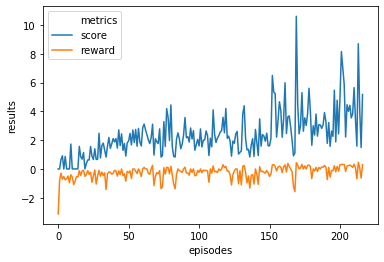

Max Train Score 22 Max Test Score 18
Mean Train Score 2.3828610147887 Mean Test Score 3.9104807392862564
----------------------------------------------------------------------------------------------------
n_eval_episode 3390.8448315271335


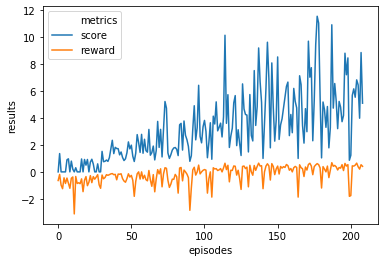

Max Train Score 22 Max Test Score 30
Mean Train Score 3.2337094061173977 Mean Test Score 5.616692216820566
----------------------------------------------------------------------------------------------------
n_eval_episode 1251.2135240600608


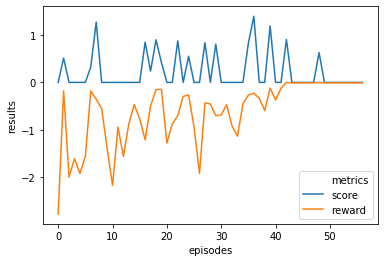

Max Train Score 2 Max Test Score 0
Mean Train Score 0.22011499741834484 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
n_eval_episode 1219.1184793774564


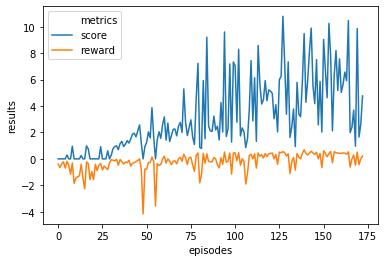

Max Train Score 20 Max Test Score 26
Mean Train Score 3.11834751169521 Mean Test Score 5.857535055218015
----------------------------------------------------------------------------------------------------
n_eval_episode 3840.043734124819


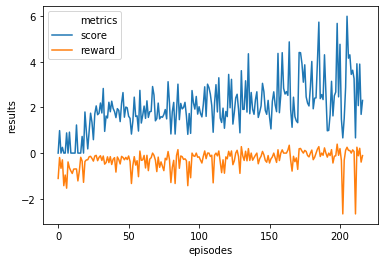

Max Train Score 13 Max Test Score 16
Mean Train Score 2.0517105384442025 Mean Test Score 3.808029883196444
----------------------------------------------------------------------------------------------------
n_eval_episode 3258.6648334184315


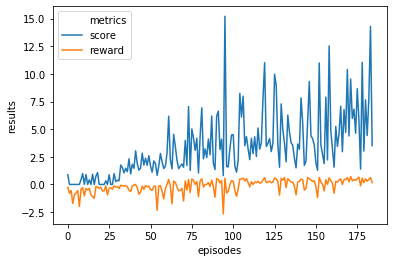

Max Train Score 29 Max Test Score 38
Mean Train Score 3.375043068683889 Mean Test Score 6.938313450134231
----------------------------------------------------------------------------------------------------
n_eval_episode 2690.330345340266


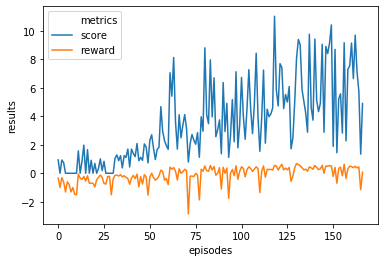

Max Train Score 22 Max Test Score 23
Mean Train Score 3.5254299136024194 Mean Test Score 6.162832045152855
----------------------------------------------------------------------------------------------------


In [56]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #entropy = random.uniform(0, 0.1)
    
    n_eval_episode = random.uniform(1000,4000)
    
    #gamma=0.97 is the best one?
    #leaning_rate=??? see the best result from previous test
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, gamma=0.97)#seed=42, gamma=0.97)#, ent_coef=entropy)
    model.learn(total_timesteps=20000, log_interval=1000, n_eval_episodes=n_eval_episode)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[n_eval_episode] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for n_eval_episode, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("n_eval_episode", n_eval_episode)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

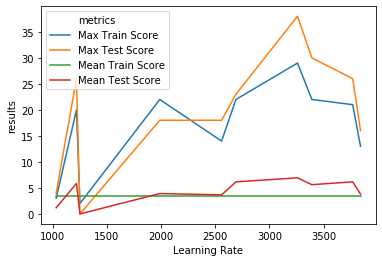

In [57]:
plot_max_results(results,'Learning Rate')

entre 3000 e 3500 è bom, e entre 1000 e 1250

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 85.6     |
|    ep_rew_mean        | -37.8    |
| time/                 |          |
|    fps                | 395      |
|    iterations         | 1000     |
|    time_elapsed       | 12       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.953   |
|    explained_variance | 0.15     |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.0155  |
|    value_loss         | 0.00305  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 78.9     |
|    ep_rew_mean        | -9.2     |
| time/                 |          |
|    fps                | 405      |
|    iterations         | 2000     |
|    time_elapsed       | 24       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.2     |
|    ep_rew_mean        | -1.2     |
| time/                 |          |
|    fps                | 420      |
|    iterations         | 2000     |
|    time_elapsed       | 23       |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.00931 |
|    explained_variance | -0.209   |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 0.00535  |
|    value_loss         | 46       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 96.9     |
|    ep_rew_mean        | 21.5     |
| time/                 |          |
|    fps                | 422      |
|    iterations         | 3000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 70.2     |
|    ep_rew_mean        | -20.2    |
| time/                 |          |
|    fps                | 412      |
|    iterations         | 3000     |
|    time_elapsed       | 36       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.463   |
|    explained_variance | -0.0513  |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 1.38     |
|    value_loss         | 2.18     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 94.8      |
|    ep_rew_mean        | -15       |
| time/                 |           |
|    fps                | 416       |
|    iterations         | 4000      |
|    time_elapsed       | 48        |
|    total_timesteps    | 20000     |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 108       |
|    ep_rew_mean        | 31.5      |
| time/                 |           |
|    fps                | 435       |
|    iterations         | 4000      |
|    time_elapsed       | 45        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.000196 |
|    explained_variance | nan       |
|    learning_rate      | 0.001     |
|    n_updates          | 3999      |
|    policy_loss        | -1.82e-05 |
|    value_loss         | 1.52      |
-------------------------------------
n_eval_episode 1032.2734336920037


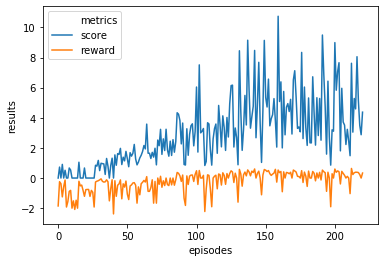

Max Train Score 19 Max Test Score 38
Mean Train Score 2.956358307915939 Mean Test Score 5.600789845353315
----------------------------------------------------------------------------------------------------
n_eval_episode 1039.9299260541056


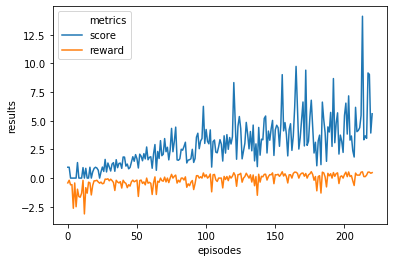

Max Train Score 27 Max Test Score 29
Mean Train Score 2.9603968386412265 Mean Test Score 5.7109110675700485
----------------------------------------------------------------------------------------------------
n_eval_episode 1141.9673218699413


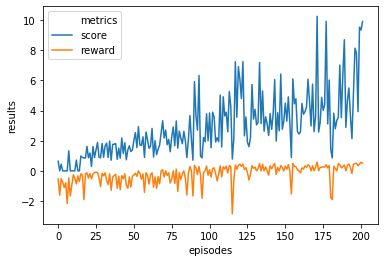

Max Train Score 21 Max Test Score 26
Mean Train Score 2.9162388342594943 Mean Test Score 5.188306736315591
----------------------------------------------------------------------------------------------------
n_eval_episode 1077.7249605039979


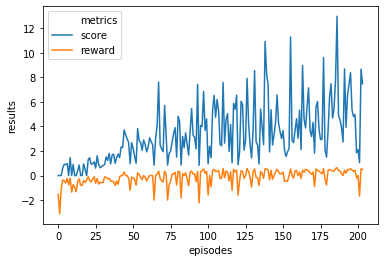

Max Train Score 27 Max Test Score 23
Mean Train Score 3.3358699393539615 Mean Test Score 5.8684205277958466
----------------------------------------------------------------------------------------------------
n_eval_episode 1134.9628096011716


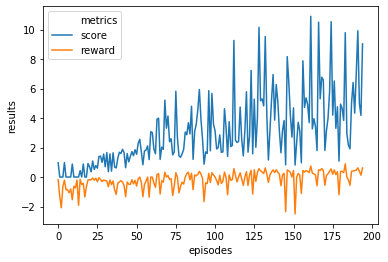

Max Train Score 22 Max Test Score 24
Mean Train Score 3.038942069969106 Mean Test Score 5.710563970710492
----------------------------------------------------------------------------------------------------


In [63]:
results = {}
for i in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    #entropy = random.uniform(0, 0.1)
    if i < 5:
        n_eval_episode = random.uniform(1000,1250)
    else:
        n__eval_episode = random.uniform(3000,3500)
    
    #gamma=0.97 is the best one?
    #leaning_rate=??? see the best result from previous test
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, gamma=0.97)#seed=42, gamma=0.97)#, ent_coef=entropy)
    model.learn(total_timesteps=20000, log_interval=1000, n_eval_episodes=n_eval_episode)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[n_eval_episode] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for n_eval_episode, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("n_eval_episode", n_eval_episode)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

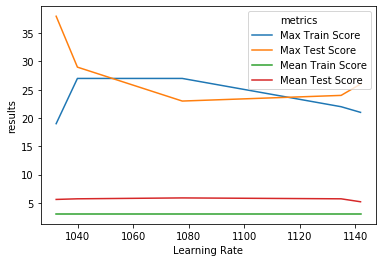

In [65]:
plot_max_results(results,'Learning Rate')

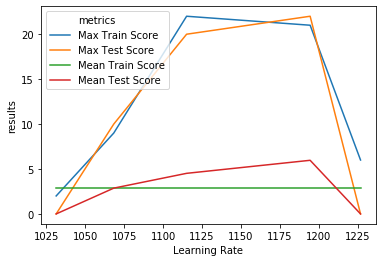

In [62]:
plot_max_results(results,'Learning Rate')
